In [1]:
import pandas as pd
import adult_data_functions as af
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
name_list = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
             "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
             "hours-per-week", "native-country", "income-label"]
categorical_colnames_list = ["workclass", "education", "marital-status", "occupation", "relationship"]
continuous_colnames_list = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

In [3]:
adult_train_dt = pd.read_csv("data/adult.data", names=name_list)
for col in categorical_colnames_list:
        adult_train_dt[col] = adult_train_dt[col].str.strip()

# Exploratory Analysis

In [4]:
adult_train_dt.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Continuous features
`capital-gain` and `captial-loss` may be considered as categorical.

In [5]:
len(continuous_colnames_list)

6

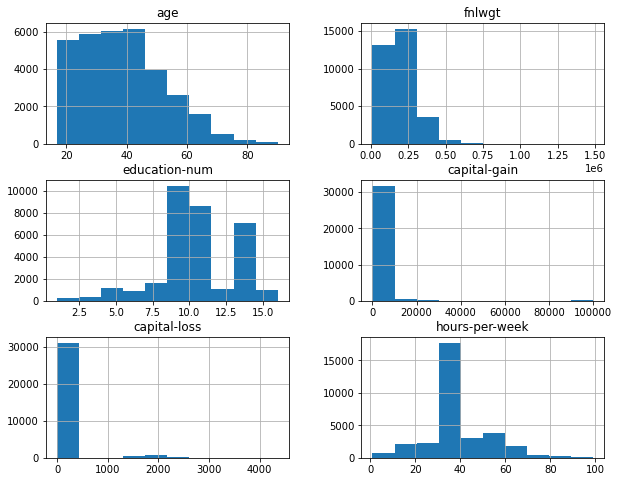

In [6]:
adult_train_dt[continuous_colnames_list].hist(figsize=(10, 8));

## Categorical Features

In [7]:
len(categorical_colnames_list)

5

In [8]:
adult_train_dt[categorical_colnames_list].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
dtype: int64

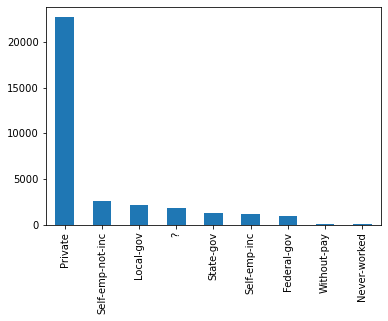

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


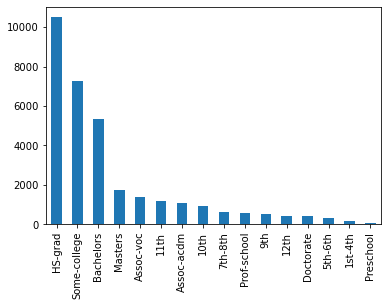

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


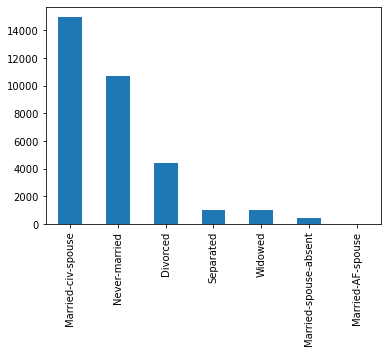

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64


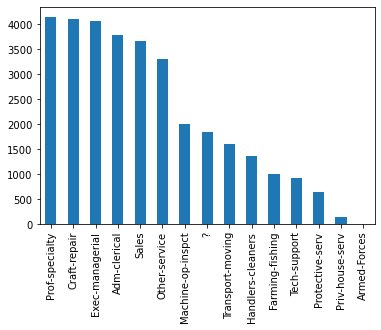

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


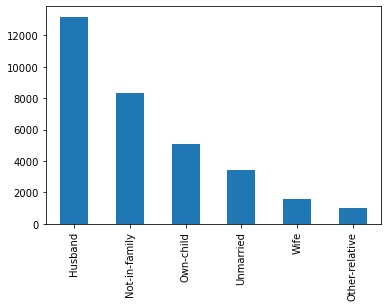

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [9]:
for col in categorical_colnames_list:
    adult_train_dt[col].value_counts().plot.bar()
    plt.show()
    print(adult_train_dt[col].value_counts())

In [10]:
adult_train_dt.loc[(adult_train_dt["occupation"] == "?") & (adult_train_dt["workclass"] != "?") ]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-label
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


## Labels

In [11]:
adult_train_dt["sex"].value_counts(normalize=True)

 Male      0.669205
 Female    0.330795
Name: sex, dtype: float64

In [12]:
adult_train_dt["income-label"].value_counts(normalize=True) 

 <=50K    0.75919
 >50K     0.24081
Name: income-label, dtype: float64

# Process Data

In [13]:
categorical_feature_encoder = preprocessing.OneHotEncoder()
sex_encoder = preprocessing.LabelEncoder() 
race_encoder = preprocessing.LabelEncoder()
income_encoder = preprocessing.LabelEncoder()

In [14]:
train_data_dict = af.preprocess(adult_dt_path="data/adult.data", 
                                categorical_feature_encoder=categorical_feature_encoder, 
                                sex_encoder=sex_encoder, race_encoder=race_encoder, 
                                income_encoder=income_encoder, encoder_fit_boolean=True)

# Fit Naive Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score, recall_score, make_scorer
import numpy as np

In [16]:
# adult_test_dt = pd.read_csv("data/adult.test", names=name_list)
# adult_test_dt = adult_test_dt.loc[adult_test_dt["sex"].notna()]
# adult_test_dt["income-label"] = adult_test_dt["income-label"].apply(lambda x: x[:-1])
test_data_dict = af.preprocess(adult_dt_path="data/adult.test", categorical_feature_encoder=categorical_feature_encoder, 
                             sex_encoder=sex_encoder, race_encoder=race_encoder, income_encoder=income_encoder, 
                             encoder_fit_boolean=False)

In [17]:
logistic_x_train_mat = np.hstack([train_data_dict["categorical-features"].toarray(), 
                            train_data_dict["continuous-features"].to_numpy()])
logistic_x_test_mat = np.hstack([test_data_dict["categorical-features"].toarray(), 
                                  test_data_dict["continuous-features"].to_numpy()])

In [18]:
pd.Series(sex_encoder.inverse_transform(test_data_dict["sex"])).value_counts(normalize=True)

Male      0.667035
Female    0.332965
dtype: float64

In [19]:
pd.Series(income_encoder.inverse_transform(test_data_dict["income-label"])).value_counts(normalize=True)

<=50K    0.763774
>50K     0.236226
dtype: float64

## Income

In [20]:
naive_logistic_model = LogisticRegression(random_state=0)
naive_logistic_model.fit(X=logistic_x_train_mat, y=train_data_dict["income-label"])

LogisticRegression(random_state=0)

In [21]:
income_encoder.transform(["<=50K", '>50K'])

array([0, 1])

In [22]:
af.score_summary(y_pred=naive_logistic_model.predict(logistic_x_test_mat),
                 y_true=test_data_dict["income-label"], pos_label=1)

,accuracy,precision,recall,f1
0,0.797801,0.691563,0.26001,0.377929


## Sex

In [23]:
naive_logistic_model = LogisticRegression(random_state=0)
naive_logistic_model.fit(X=logistic_x_train_mat, y=train_data_dict["sex"])

LogisticRegression(random_state=0)

In [24]:
sex_encoder.transform(["Male", "Female"])

array([1, 0])

In [25]:
af.score_summary(y_pred=naive_logistic_model.predict(logistic_x_test_mat),
                 y_true=test_data_dict["income-label"], pos_label=0)

,accuracy,precision,recall,f1
0,0.355691,0.907757,0.174105,0.292173


In [26]:
af.score_summary(y_pred=naive_logistic_model.predict(logistic_x_test_mat),
                 y_true=test_data_dict["income-label"], pos_label=1)

,accuracy,precision,recall,f1
0,0.355691,0.260938,0.942798,0.408748


# Fit Ridge Logistic Regression

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Income

In [28]:
# np.logspace(3, 8, 10)
scaler = StandardScaler()
logistic = LogisticRegression(max_iter=1000, random_state=0)

pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])
param_grid = {
    "logistic__C": np.linspace(10**3, 10**4, 50),
}

recall_scorer = make_scorer(recall_score, pos_label=1)

search = GridSearchCV(pipe, param_grid, n_jobs=16, scoring=recall_scorer)       
search.fit(X=logistic_x_train_mat, y=train_data_dict["income-label"])    

test_accuracy = search.score(X=logistic_x_test_mat, y=test_data_dict["income-label"])

print(f"best parameter: {search.best_params_}, cv score: {search.best_score_}")

best parameter: {'logistic__C': 2469.3877551020405}, cv score: 0.5978847992351817


In [29]:
af.score_summary(y_pred=search.predict(logistic_x_test_mat), 
                 y_true=test_data_dict["income-label"], pos_label=1)

,accuracy,precision,recall,f1
0,0.851668,0.729695,0.591004,0.653067


In [30]:
af.score_summary(y_pred=search.predict(logistic_x_test_mat), 
                 y_true=test_data_dict["income-label"], pos_label=0)

,accuracy,precision,recall,f1
0,0.851668,0.880526,0.932288,0.905668


## Sex

In [31]:
recall_scorer = make_scorer(recall_score, pos_label=0)

search = GridSearchCV(pipe, param_grid, n_jobs=16, scoring=recall_scorer)       
search.fit(X=logistic_x_train_mat, y=train_data_dict["sex"])    

test_accuracy = search.score(X=logistic_x_test_mat, y=test_data_dict["sex"])

print(f"best parameter: {search.best_params_}, cv score: {search.best_score_}")

best parameter: {'logistic__C': 7979.591836734693}, cv score: 0.7965828426905537


In [32]:
# female
af.score_summary(y_pred=search.predict(logistic_x_test_mat),
                 y_true=test_data_dict["sex"], pos_label=0)

,accuracy,precision,recall,f1
0,0.843621,0.747036,0.801882,0.773488


In [33]:
af.score_summary(y_pred=search.predict(logistic_x_test_mat),
                 y_true=test_data_dict["sex"], pos_label=1)

,accuracy,precision,recall,f1
0,0.843621,0.897343,0.864457,0.880593
